# Kramers–Moyal expansion

https://en.wikipedia.org/wiki/Kramers%E2%80%93Moyal_expansion

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# Define the stock symbol and time period
symbol = "AAPL"
start_date = "2023-01-01"
end_date = "2023-02-01"


In [3]:
# Retrieve the historical data for the stock
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.879326,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,126.167366,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.829399,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.422394,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.951584,70790800


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.643738,65799300
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.740540,54105100
2023-01-27,143.160004,147.229996,143.080002,145.929993,145.707520,70555800
2023-01-30,144.960007,145.550003,142.850006,143.000000,142.781998,64015300
2023-01-31,142.699997,144.339996,142.279999,144.289993,144.070023,65874500


In [6]:
# Calculate the daily returns and log returns
returns = df['Adj Close'].pct_change()[1:]

In [7]:
# First four moments of the returns distribution
mean = np.mean(returns)
variance = np.var(returns)
skewness = np.mean((returns-mean)**3) / variance**(3/2)
kurtosis = np.mean((returns-mean)**4) / variance**2 - 3

In [8]:
# Drift and diffusion coefficients of the Kramers-Moyal expansion
dt = 1/252 # assuming daily sampling frequency
mu = skewness*dt/3 + kurtosis*(dt**2)/12
sigma = np.sqrt(variance*dt/3 + (skewness*dt/3)**2 + kurtosis*(dt**2)/6)


In [9]:
# Define the grid of x values to evaluate the PDF
x = np.linspace(-0.1, 0.1, 100)

In [10]:
# Calculate the PDF using the Kramers-Moyal expansion
pdf = np.exp(-(x-mu*dt)**2/(2*sigma**2*dt))/np.sqrt(2*np.pi*sigma**2*dt)

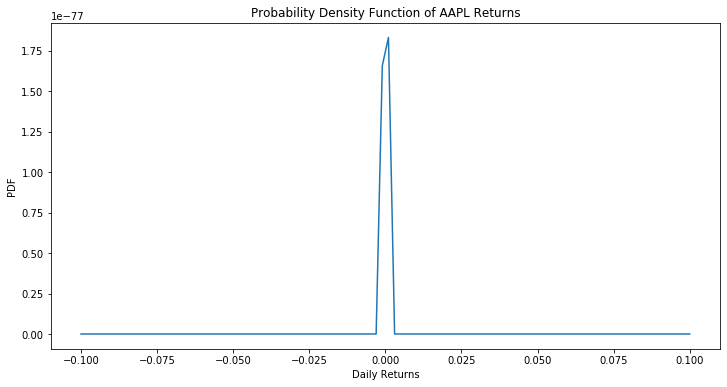

In [14]:
# Plot the simulated stock prices
plt.figure(figsize=(12,6))
plt.plot(x, pdf)
plt.title(f'Probability Density Function of {symbol} Returns')
plt.xlabel('Daily Returns')
plt.ylabel('PDF')
plt.show()